# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from requests.utils import requote_uri
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
fill_url = requests.utils.requote_uri
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print()
print(f"Total number of cities: {total_cities}")


Total number of cities: 606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set variables needed for analysis
city_weather = []
cou = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
city_num = 1
city_set = 1 

# Language to show processing
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Pull data to create dataframe
for city in cities:
    try:
        final_url = fill_url(query_url + city)
#         print(final_url)
        response = requests.get(final_url).json()
#         print(response)
        city_weather.append(response['name'])
        cou.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

        print(f"Processing Record {city_num} of set {city_set} | {city}")
        
        # Add one to city count
        city_num += 1 
    
    except (KeyError):
        print("City not found....Skipping............")
        
    #Create sets of 50
    if city_num == 51:
        city_set += 1
        city_num = 1

print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | sao joao da barra
Processing Record 2 of set 1 | coihaique
Processing Record 3 of set 1 | saint-philippe
Processing Record 4 of set 1 | arraial do cabo
Processing Record 5 of set 1 | dikson
Processing Record 6 of set 1 | thompson
Processing Record 7 of set 1 | puerto ayora
City not found....Skipping............
Processing Record 8 of set 1 | abha
Processing Record 9 of set 1 | new norfolk
Processing Record 10 of set 1 | butaritari
Processing Record 11 of set 1 | sola
Processing Record 12 of set 1 | manono
Processing Record 13 of set 1 | ancud
Processing Record 14 of set 1 | pevek
Processing Record 15 of set 1 | axim
Processing Record 16 of set 1 | provideniya
Processing Record 17 of set 1 | thinadhoo
Processing Record 18 of set 1 | ushuaia
Processing Record 19 of set 1 | suntar
Processing Record 20 of set 1 | igrim
Processing Record 21 of set 1 | te anau
Processing Recor

Processing Record 28 of set 4 | saint-pierre
Processing Record 29 of set 4 | mitsamiouli
Processing Record 30 of set 4 | bathsheba
Processing Record 31 of set 4 | matay
Processing Record 32 of set 4 | hofn
Processing Record 33 of set 4 | buala
City not found....Skipping............
Processing Record 34 of set 4 | manuk mangkaw
Processing Record 35 of set 4 | ribeira grande
Processing Record 36 of set 4 | ponta do sol
Processing Record 37 of set 4 | panuco
Processing Record 38 of set 4 | faanui
Processing Record 39 of set 4 | upata
Processing Record 40 of set 4 | zhigansk
Processing Record 41 of set 4 | dingle
Processing Record 42 of set 4 | sampit
Processing Record 43 of set 4 | teya
City not found....Skipping............
Processing Record 44 of set 4 | ishigaki
Processing Record 45 of set 4 | manjacaze
Processing Record 46 of set 4 | banff
Processing Record 47 of set 4 | leh
Processing Record 48 of set 4 | batemans bay
Processing Record 49 of set 4 | abonnema
Processing Record 50 of s

Processing Record 13 of set 8 | leirvik
Processing Record 14 of set 8 | jumla
Processing Record 15 of set 8 | aykhal
Processing Record 16 of set 8 | qasigiannguit
Processing Record 17 of set 8 | otane
City not found....Skipping............
Processing Record 18 of set 8 | leshukonskoye
Processing Record 19 of set 8 | baykit
City not found....Skipping............
Processing Record 20 of set 8 | puteyets
Processing Record 21 of set 8 | fez
Processing Record 22 of set 8 | cooma
Processing Record 23 of set 8 | praia da vitoria
Processing Record 24 of set 8 | batie
Processing Record 25 of set 8 | camargo
Processing Record 26 of set 8 | hasaki
Processing Record 27 of set 8 | yar-sale
Processing Record 28 of set 8 | morgan city
Processing Record 29 of set 8 | kamenka
Processing Record 30 of set 8 | buraydah
Processing Record 31 of set 8 | colomi
Processing Record 32 of set 8 | liverpool
Processing Record 33 of set 8 | varnamo
Processing Record 34 of set 8 | sihora
Processing Record 35 of set 8

Processing Record 46 of set 11 | jadu
Processing Record 47 of set 11 | srednekolymsk
Processing Record 48 of set 11 | deputatskiy
Processing Record 49 of set 11 | labuhan
Processing Record 50 of set 11 | nong phai
Processing Record 1 of set 12 | greymouth
Processing Record 2 of set 12 | muros
Processing Record 3 of set 12 | lazurne

-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary to hold all cities
weather_dict = {
    'City' : city_weather,
    'County' : cou, 
    'Latitude' : lat,
    'Longitude' : long,
    'Tempurature' : temp,
    'Humidity' : humid,
    'Cloudiness' : cloud, 
    'Wind Speed': wind
}

# Convert to DataFrame
weather_data = pd.DataFrame(weather_dict)

#Export to CSV
weather_data.to_csv("Outputs/Weather_Data", index=False, header=True)

weather_data

,City,County,Latitude,Longitude,Tempurature,Humidity,Cloudiness,Wind Speed
0,São João da Barra,BR,-21.6403,-41.0511,28.00,57,20,1.03
1,Coyhaique,CL,-45.5752,-72.0662,21.00,52,0,2.06
2,Saint-Philippe,RE,-21.3585,55.7679,27.17,66,0,10.29
3,Arraial do Cabo,BR,-22.9661,-42.0278,27.41,65,20,5.66
4,Dikson,RU,73.5069,80.5464,-28.98,89,100,4.48
...,...,...,...,...,...,...,...,...
548,Labuhan,ID,-6.8844,112.2051,25.63,87,100,2.12
549,Nong Phai,TH,15.9903,101.0618,26.11,59,10,0.88
550,Greymouth,NZ,-42.4667,171.2000,11.10,84,40,2.74
551,Muros,ES,42.7762,-9.0603,12.96,67,96,6.26


In [6]:
#Statistical summary
weather_data.describe()

,Latitude,Longitude,Tempurature,Humidity,Cloudiness,Wind Speed
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,20.328946,17.215429,10.364955,71.027125,50.743219,3.646763
std,33.171532,89.726443,19.356417,20.260737,39.385533,2.555847
min,-54.800000,-175.200000,-41.000000,5.000000,0.000000,0.150000
25%,-7.844700,-63.598600,-4.310000,64.000000,5.000000,1.830000
50%,22.690600,23.825800,17.990000,75.000000,46.000000,3.090000
75%,49.116700,93.034400,26.000000,87.000000,90.000000,4.630000
max,78.218600,178.416700,41.220000,100.000000,100.000000,14.690000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

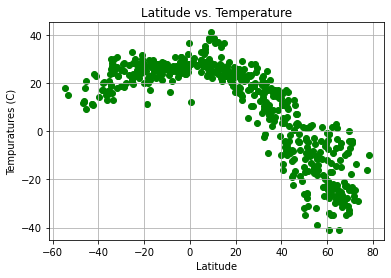

In [7]:
#Define variables
lat = weather_data['Latitude']
temp = weather_data['Tempurature']

#Plot
plt.scatter(lat, temp, color='green')

#Lable
plt.xlabel('Latitude')
plt.ylabel('Tempuratures (C)')
plt.title('Latitude vs. Temperature')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Temperature.png")

The plot above shows how the temperature changes across the globe. Since we know the equator to be zero we can see that the highest temperatures are closest to zero and the temperature decreases as you move away from the equator, latitude 0.

### Latitude vs. Humidity Plot

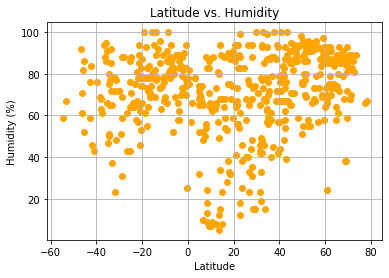

In [8]:
#Define new variables
humid = weather_data['Humidity']

#Plot
plt.scatter(lat, humid, color='orange')

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Humidity.png")

The plot above shows humidity levels across the globe. There does not seem to be a correlation between humidity and location.

### Latitude vs. Cloudiness Plot

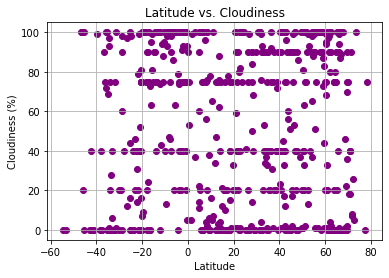

In [9]:
#Define new variables 
cloud = weather_data['Cloudiness']

#Plot
plt.scatter(lat, cloud, color='purple')

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid('true')


#Save file as png
plt.savefig("Outputs/Latitude vs. Cloudiness.png")

The plot above shows percent cloudiness across the globe. There appears to be some consistency between some temperatures and cloudiness but more statistical tests are needed to established correlation.

### Latitude vs. Wind Speed Plot

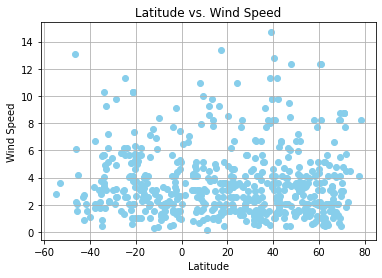

In [10]:
#Add new variables 
wind = weather_data['Wind Speed']

#Plot
plt.scatter(lat, wind, color='skyblue')

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Wind Speed.png")

The plot above shows the windspeed across the globe. In general, there seems to be few instances of extremely high wind speed as most speeds are clustered around the bottom of the plot.

## Linear Regression

In [12]:
#Establish north and south hemisphere dataframes

north = weather_data.loc[weather_data['Latitude'] >= 0]
north.head()
# print(len(north))
south = weather_data.loc[weather_data['Latitude'] < 0]
# print(len(south))

## Tempurature vs. Latitude Linear Regression

####  Northern Hemisphere - Tempurature vs. Latitude Linear Regression

The r-value is: 0.7828313340560048


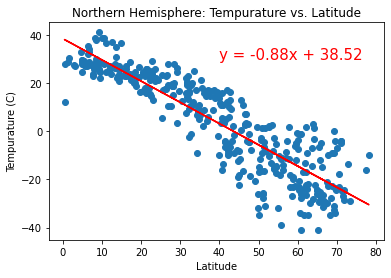

In [13]:
from scipy import stats

#Add associated y_axis
north_lat = north['Latitude']
north_temp = north['Tempurature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Tempurature (C)')
plt.title('Northern Hemisphere: Tempurature vs. Latitude')
plt.annotate(lneq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Tempurature vs. Latitude Linear Regression

The r-value is: 0.3461404853267619


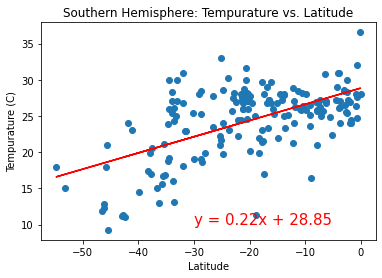

In [16]:
#Add associated y_axis
south_lat = south['Latitude']
south_temp = south['Tempurature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Tempurature (C)')
plt.title('Southern Hemisphere: Tempurature vs. Latitude')
plt.annotate(lneq,(-30, 10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [ ]:
#write up

## Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17672487962988992


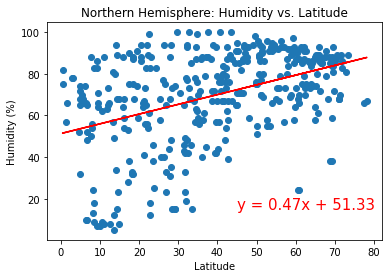

In [17]:
#Add associated y_axis
north_hum = north['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_hum)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(45,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06930448170504198


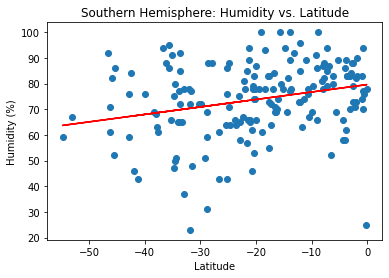

In [18]:
#Add associated y_axis
south_hum = south['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_hum)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(-25, 17),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [ ]:
#write up

## Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010644401661659773


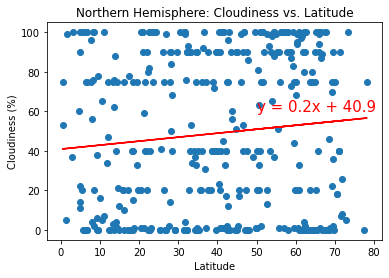

In [23]:
#Add associated y_axis
north_cloud = north['Cloudiness']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(lneq,(50,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1306535590258185


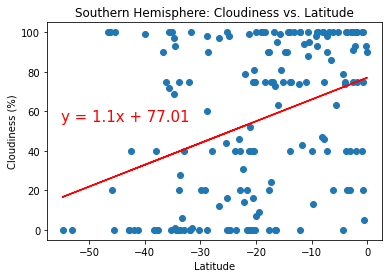

In [21]:
#Add associated y_axis
south_cloud = south['Cloudiness']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(lneq,(-55, 55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [ ]:
#write up

## Wind Speed vs Latitude Linear Regression

####  Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

The r-value is: 0.0006230969767570708


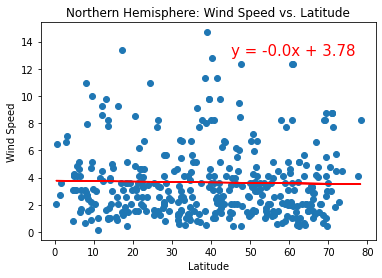

In [26]:
#Add associated y_axis
north_wind = north['Wind Speed']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(lneq,(45,13),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01376082264829891


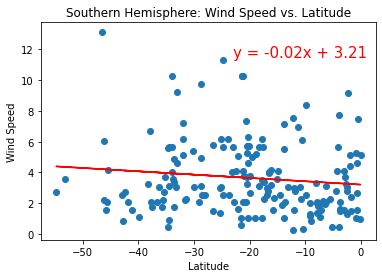

In [27]:
#Add associated y_axis
south_wind = south['Wind Speed']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(lneq,(-23, 11.5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [ ]:
#write up